#  Aviation Accidents and Incidents Data Analysis

### 1. Business Problem
The company is planning to start a new aviation venture and must decide which aircraft types to purchase.  
As a data analyst, I have been tasked with identifying which aircraft are the lowest risk based on historical accident and incident data (1962–2023).  

#### 1.1 Objectives
The objective is to translate these findings into **actionable insights** and **business recommendations** that will support decision-making for the new aviation division. Specifically, the analysis will focus on: 
    
    1. **Aircraft Category Risk:** Identify which aircraft categories (e.g., Single-Engine, Multi-Engine, Helicopter) are associated with lower accident severity.  
    2. **Manufacturer/Model Safety:** Analyze accident severity by aircraft make and model to highlight safer options for purchase.  
    3. **Contextual Risk Factors:** Examine how weather conditions, purpose of flight, and phases of flight contribute to accident severity.  


### 2. Importing the Dataset

 The data comes from the National Transportation Safety Board (NTSB) and contains details about civil aviation accidents and selected incidents in the United States and international waters.

Before beginning any analysis, the first step is to import the dataset into a pandas DataFrame.

> **Note:** While loading the dataset, pandas raised a `DtypeWarning` because some columns contain mixed data types (for example, a mix of numbers and text).  
To handle this, I used the argument `low_memory=False` in `pd.read_csv()`.  
This tells pandas to process the file in larger chunks and assign more consistent data types, 
avoiding potential issues later in the analysis.

In [477]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset

df = pd.read_csv(r"C:\Users\Anne Wangui\Downloads\Aviation_Data.csv",low_memory=False)

# preview the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### 3. Data Understanding

Before diving into cleaning and analysis, it is important to understand the structure and quality of the dataset.
In this step, I will explore the dimensions of the data, column types, missing values, and basic descriptive statistics.

In [478]:
df.shape # checks to see the number of rows and columns in the dataset.

(90348, 31)

In [479]:
df.info() # provides details about each column, including the data type and the count of non-missing values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [480]:
# Check the number of missing values in each column, sorted from highest to lowest
# This is crucial for planning the data cleaning stage.
df.isnull().sum().sort_values(ascending=False) 

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2841
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

In [481]:
# Looks for the percentage of missing values in each column
df.isnull().sum()/df.shape[0*100]

Event.Id                  0.016149
Investigation.Type        0.000000
Accident.Number           0.016149
Event.Date                0.016149
Location                  0.016724
Country                   0.018650
Latitude                  0.619449
Longitude                 0.619549
Airport.Code              0.445123
Airport.Name              0.416656
Injury.Severity           0.027217
Aircraft.damage           0.051501
Aircraft.Category         0.642637
Registration.Number       0.031445
Make                      0.016846
Model                     0.017167
Amateur.Built             0.017278
Number.of.Engines         0.083488
Engine.Type               0.094689
FAR.Description           0.645559
Schedule                  0.860738
Purpose.of.flight         0.084684
Air.carrier               0.815735
Total.Fatal.Injuries      0.142339
Total.Serious.Injuries    0.154613
Total.Minor.Injuries      0.148227
Total.Uninjured           0.081585
Weather.Condition         0.065868
Broad.phase.of.fligh

In [482]:
# summary statistics for the numerical columns to get an overview of central tendency, spread, and distribution.
# This includes measures such as mean, median, and standard deviation.
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### 4. Data Preparation/Cleaning
Before analysis, it is essential to prepare and clean the dataset to ensure accuracy and reliability of insights.
Data cleaning involves:

  - Removing duplicates to avoid double-counting.

  - Handling missing values by either imputing, dropping, or flagging them depending on importance.

  - Correcting erroneous or extraneous values such as "?", "Unknown", or outlier numbers like 999.

  - Standardizing data types and categories (e.g., converting dates to datetime, normalizing categorical labels).

This process ensures the dataset is consistent, complete, and ready for meaningful analysis.

#### 4.1 Check for Duplicates

In [483]:
df.duplicated().value_counts()


False    88958
True      1390
Name: count, dtype: int64

#### 4.2 Remove Duplicates

In [484]:
df = df.drop_duplicates() 
df.shape # Previously this was (90348, 31), now we have dropped duplicate rows 

(88958, 31)

#### 4.3 Check Garbage Values
Sometimes datasets contain "garbage values" like `"?"`, `"??"`, `"N/A"`, `"na"`, `"none"`, `"None"`, `"unknown"`, `"-"`, `"--"`, or even just a space `" "`.  
These are not true missing values (`NaN`) but they behave like them and can affect analysis.  

In [485]:
# checking for garbage values
garbage_like = ["?", "??", "N/A", "na", "none", "None", "unknown", "-", "--", " "]

for col in df.select_dtypes(include="object").columns:
    bad_values = df[col][df[col].isin(garbage_like)].unique()
    if len(bad_values) > 0:
        print(f"Garbage values found in {col}: {bad_values}")

Garbage values found in Airport.Code: ['none' 'na' '-']
Garbage values found in Airport.Name: ['na']
Garbage values found in Registration.Number: ['none' 'unknown']
Garbage values found in Make: ['unknown']
Garbage values found in Model: ['unknown' 'none']
Garbage values found in Air.carrier: ['unknown']


#### 4.4 Clean the Garbage Values

In [486]:
# cleaning the garbage values
import numpy as np

# Define garbage-like values
garbage_like = ["?", "??", "N/A", "na", "none", "None", "unknown", "-", "--", " "]

# Replace them with NaN in all object columns
df.replace(garbage_like, np.nan, inplace=True)

In [487]:
# recheck for the garbage values
for col in df.select_dtypes(include="object").columns:
    print(f"{col} → {df[col].isnull().sum()} missing values")

Event.Id → 69 missing values
Investigation.Type → 0 missing values
Accident.Number → 69 missing values
Event.Date → 69 missing values
Location → 121 missing values
Country → 295 missing values
Latitude → 54576 missing values
Longitude → 54585 missing values
Airport.Code → 38840 missing values
Airport.Name → 36255 missing values
Injury.Severity → 1069 missing values
Aircraft.damage → 3263 missing values
Aircraft.Category → 56671 missing values
Registration.Number → 1459 missing values
Make → 133 missing values
Model → 163 missing values
Amateur.Built → 171 missing values
Engine.Type → 7165 missing values
FAR.Description → 56935 missing values
Schedule → 76376 missing values
Purpose.of.flight → 6261 missing values
Air.carrier → 72311 missing values
Weather.Condition → 4561 missing values
Broad.phase.of.flight → 27234 missing values
Report.Status → 6453 missing values
Publication.Date → 15299 missing values


#### 4.5 Drop the Columns that are not necessary, rows with missing values and do Imputations where necessary

In [488]:
# drop the below rows, since they have alot of missing values and they're not important while doing analysis
# Very high missing percentages 70k+ in the overall dataset
df.drop(columns=["Schedule", "Air.carrier", "FAR.Description"], inplace=True)

In [489]:
df.shape # the shape before was (88958, 31)

(88958, 28)

In [490]:
# Dropping rows with missing key values
#These are identifiers + date → without them, the record is unusable (you can’t track when/which accident happened).
df.dropna(subset=["Event.Id", "Event.Date", "Accident.Number"], inplace=True)

In [491]:
df.shape # Some rows were dropped and therefore the chenge in shape

(88889, 28)

In [492]:
# dropped the below columns too since they're not necessary for the analysis also
drop_cols = ["Registration.Number", "Airport.Code", 
            "Airport.Name", "Publication.Date"]
df.drop(columns=drop_cols, inplace=True)

##### 4.5.1 Imputation Code
    
    - Replace missing categorical values with "Unknown" so you don’t lose rows.
    - Uses mode for simple binary/text categorical variables (like Amateur.Built).
    - Uses median for numeric engine counts

In [493]:
# Categorical columns to fill with "Unknown"
categorical_unknown = [
    "Location", "Country", "Injury.Severity", "Aircraft.damage",
    "Aircraft.Category", "Make", "Model", "Engine.Type",
    "Purpose.of.flight", "Broad.phase.of.flight", "Report.Status"
]

for col in categorical_unknown:
    df[col].fillna("Unknown", inplace=True)

# Categorical columns to fill with mode (most frequent value)
categorical_mode = ["Amateur.Built", "Weather.Condition"]

for col in categorical_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numeric column to fill with median
df["Number.of.Engines"].fillna(df["Number.of.Engines"].median(), inplace=True)

In [494]:
# Check remaining missing values in each column
print(df.isnull().sum())

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  54507
Longitude                 54516
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64


##### 4.5.2 drop few more columns **Latitude**, **Longitude** and **Location**, since they have alot of missing values and mapping wouldn't be necessary for this analysis, while replacing missing injury counts with 0 since they'll be crucial in our analysis.

In [495]:
# Drop latitude/longitude (too many missing, not needed for risk analysis)
df.drop(columns=["Latitude", "Longitude","Location"], inplace=True)

# Fill missing injury counts with 0
injury_cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries", 
               "Total.Minor.Injuries", "Total.Uninjured"]

for col in injury_cols:
    df[col].fillna(0, inplace=True)

In [496]:
# Check  if there are remaining missing values in each column
print(df.isnull().sum())

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64


#### 4.6 Check for Standardization of Dates

In [497]:
# Example: checking the first few values
df['Event.Date'].head(10)

0    1948-10-24
1    1962-07-19
2    1974-08-30
3    1977-06-19
4    1979-08-02
5    1979-09-17
6    1981-08-01
7    1982-01-01
8    1982-01-01
9    1982-01-01
Name: Event.Date, dtype: object

In [498]:
# Convert to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

In [499]:
# confirm that the dtype is converted from object to datetime.
df['Event.Date'].dtype

dtype('<M8[ns]')

#### 4.7 Check unique values

In [500]:
df.nunique().sort_values(ascending=False)

Accident.Number           88863
Event.Id                  87951
Report.Status             17007
Event.Date                14782
Model                     12316
Make                       8236
Total.Uninjured             379
Country                     219
Total.Fatal.Injuries        125
Injury.Severity             110
Total.Minor.Injuries         57
Total.Serious.Injuries       50
Purpose.of.flight            26
Aircraft.Category            15
Broad.phase.of.flight        12
Engine.Type                  12
Number.of.Engines             7
Weather.Condition             4
Aircraft.damage               4
Investigation.Type            2
Amateur.Built                 2
dtype: int64

In [501]:
df['Injury.Severity'].value_counts(dropna=False).head(50)

Injury.Severity
Non-Fatal      67357
Fatal(1)        6167
Fatal           5262
Fatal(2)        3711
Incident        2219
Fatal(3)        1147
Unknown         1000
Fatal(4)         812
Fatal(5)         235
Minor            218
Serious          173
Fatal(6)         161
Unavailable       96
Fatal(7)          56
Fatal(8)          51
Fatal(10)         32
Fatal(9)          18
Fatal(14)         11
Fatal(11)         10
Fatal(13)          9
Fatal(12)          8
Fatal(15)          5
Fatal(20)          5
Fatal(18)          5
Fatal(25)          4
Fatal(23)          4
Fatal(19)          3
Fatal(17)          3
Fatal(16)          3
Fatal(34)          3
Fatal(97)          2
Fatal(160)         2
Fatal(65)          2
Fatal(46)          2
Fatal(102)         2
Fatal(118)         2
Fatal(71)          2
Fatal(349)         2
Fatal(75)          2
Fatal(104)         2
Fatal(92)          2
Fatal(24)          2
Fatal(52)          2
Fatal(113)         2
Fatal(27)          2
Fatal(131)         2
Fatal(29)         

In [502]:
# Step 1: Clean the original Injury.Severity text (lowercase + fill missing)
df['Injury_Severity'] = df['Injury.Severity'].str.lower().fillna('unknown')

# Step 2: Apply classification to Injury_Severity
df['Injury_Severity'] = df['Injury_Severity'].apply(
    lambda x: 'Fatal' if 'fatal' in x else
              'Serious' if 'serious' in x else
              'Minor' if 'minor' in x else
              'Non-Fatal' if 'non-fatal' in x or 'incident' in x else
              'Unknown' if 'unknown' in x or 'unavailable' in x else
              'Other'
)


In [503]:
#Cleaned injury_severity
df['Injury_Severity'].value_counts()

Injury_Severity
Fatal        85183
Non-Fatal     2219
Unknown       1096
Minor          218
Serious        173
Name: count, dtype: int64

In [504]:
df.shape

(88889, 22)

### 5 Exploratory Data Analysis (EDA)

After completing the data cleaning process, we now move into **Exploratory Data Analysis (EDA)**.  
The goal of EDA is to understand the structure of the dataset, identify key patterns, and generate insights that will guide the risk analysis of aircraft.

#### 5.1 Dataset Overview

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Country                 88889 non-null  object        
 5   Injury.Severity         88889 non-null  object        
 6   Aircraft.damage         88889 non-null  object        
 7   Aircraft.Category       88889 non-null  object        
 8   Make                    88889 non-null  object        
 9   Model                   88889 non-null  object        
 10  Amateur.Built           88889 non-null  object        
 11  Number.of.Engines       88889 non-null  float64       
 12  Engine.Type             88889 non-null  object     

In [506]:
df.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88889,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000
mean,1999-09-17 17:13:39.354475904,1.136552,0.564761,0.240491,0.309127,4.971245
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000
std,NaN,0.432545,5.126649,1.434614,2.083715,27.002011


In [507]:
df.shape

(88889, 22)

#### 5.2 Distributions of Categorical Variables (Bar Charts)

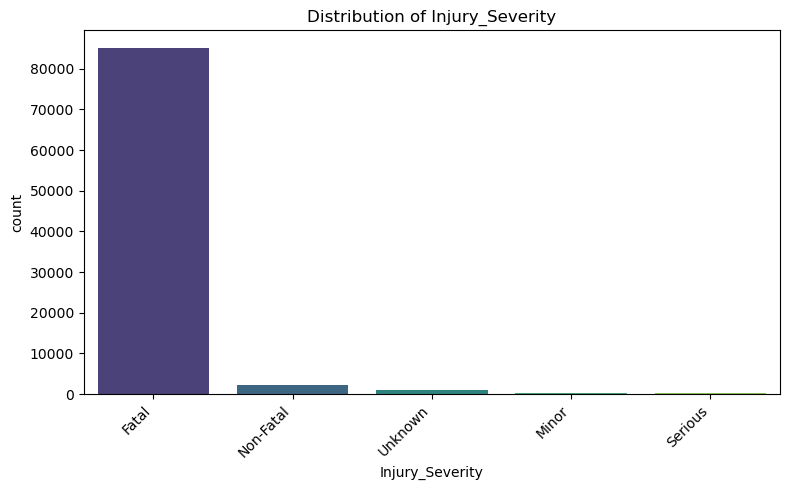

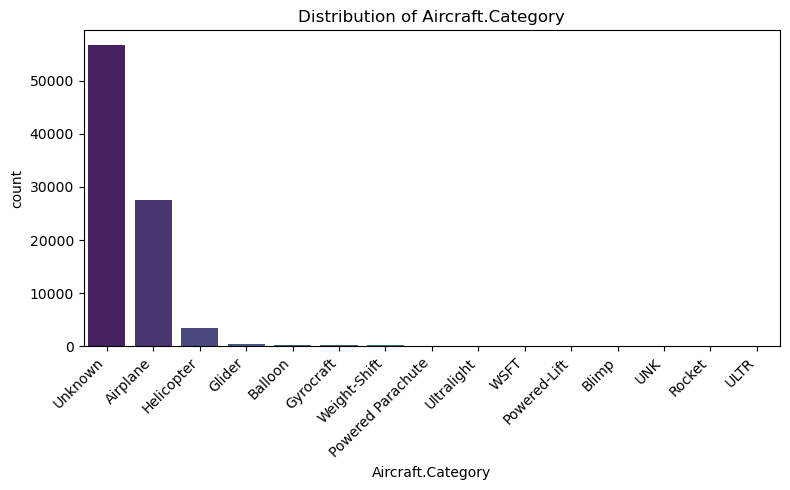

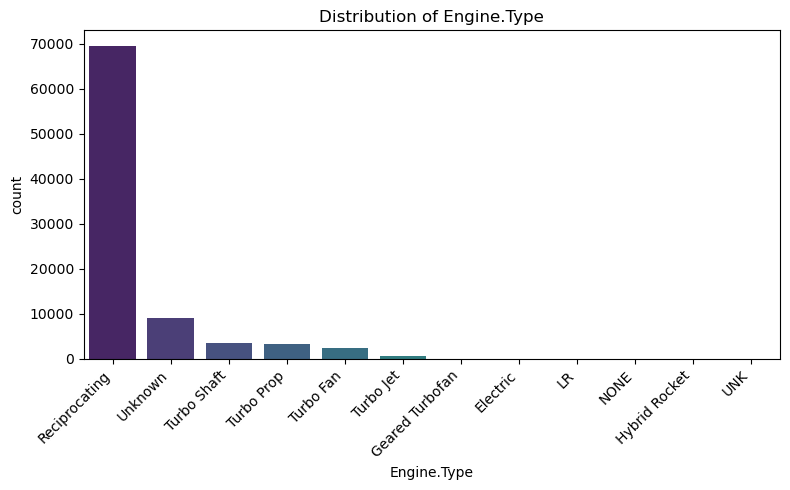

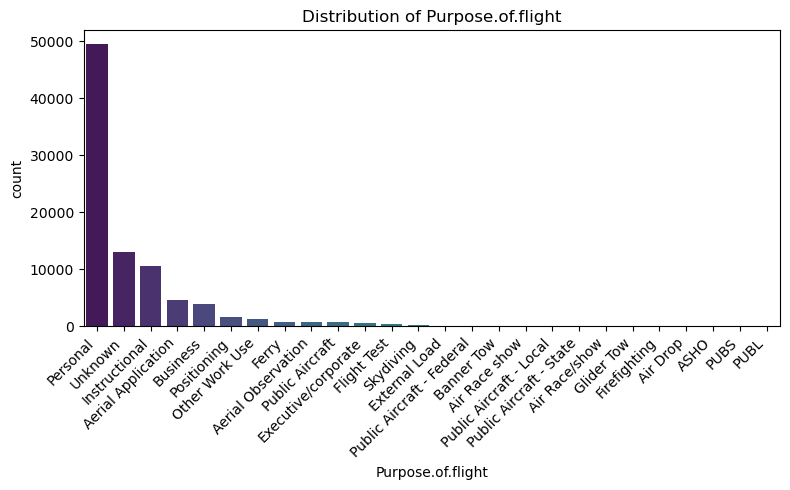

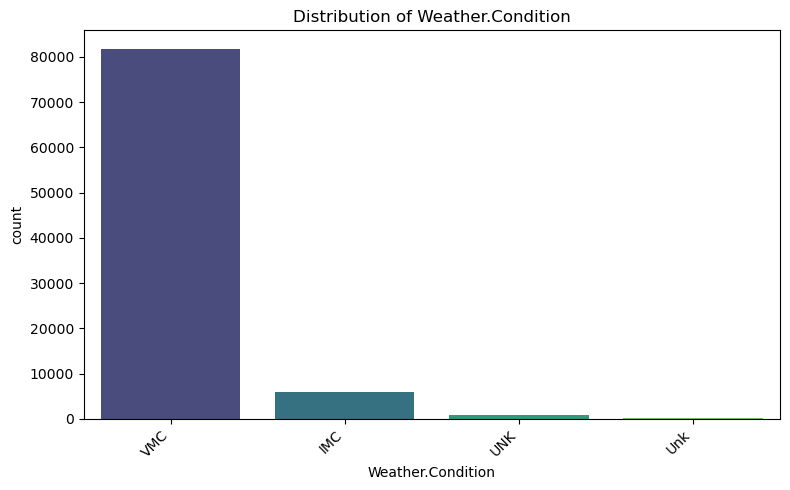

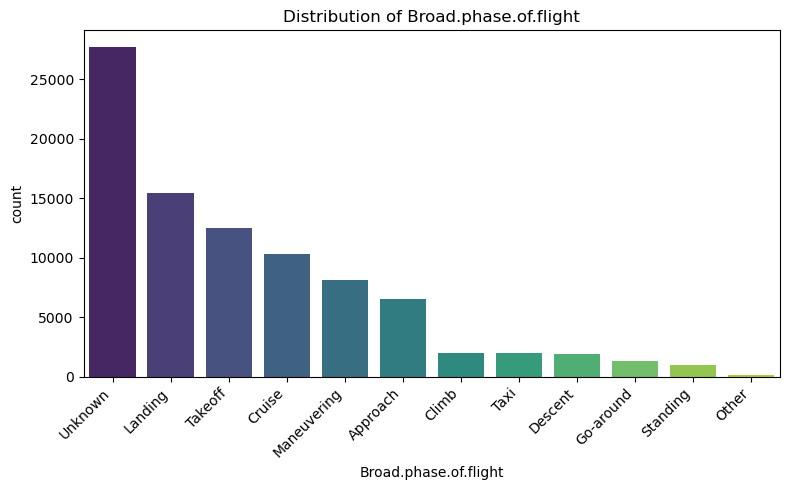

In [508]:
categorical_cols = [
    'Injury_Severity',             
    'Aircraft.Category',
    'Engine.Type',
    'Purpose.of.flight',
    'Weather.Condition',
    'Broad.phase.of.flight'
]

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')  # ha='right' helps with long labels
    plt.tight_layout()                   # avoids label cutoff
    plt.show()

#### 5.3 Distributions for Continous Variables

In [509]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

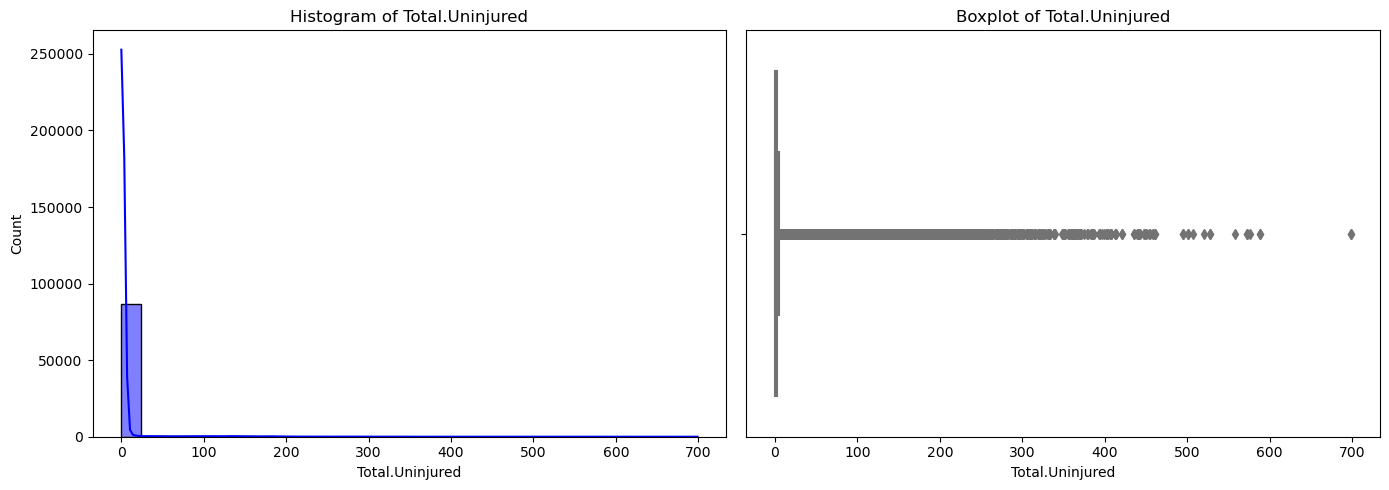

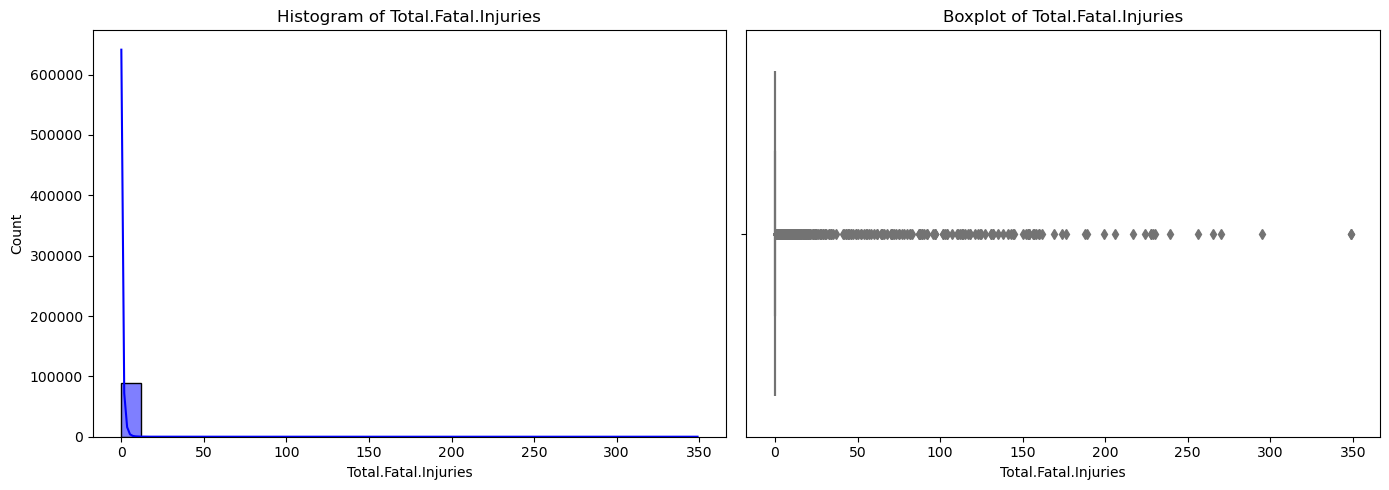

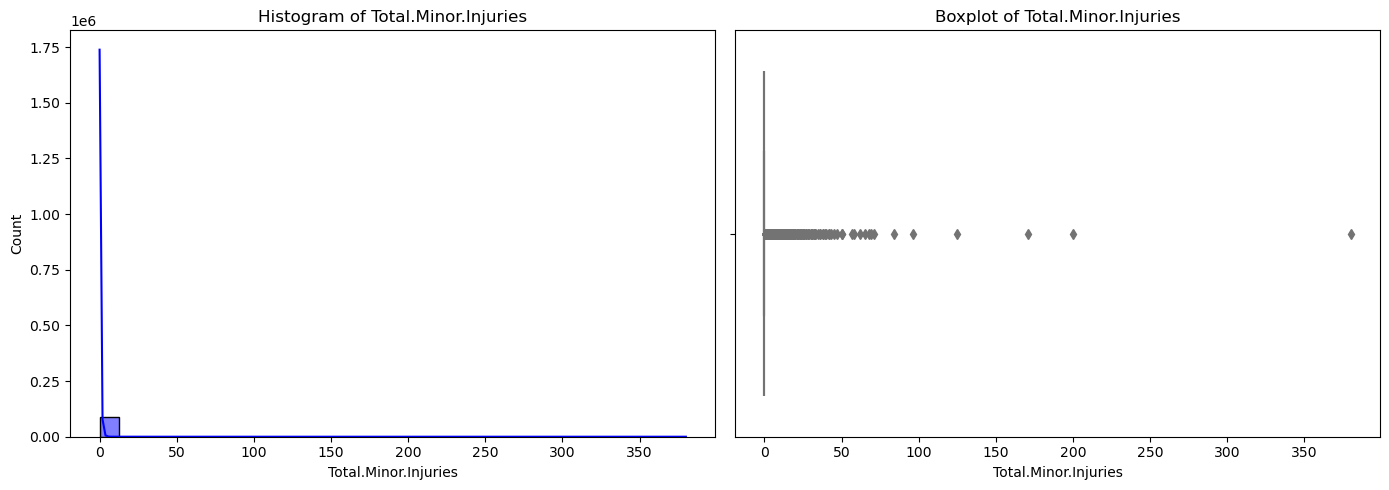

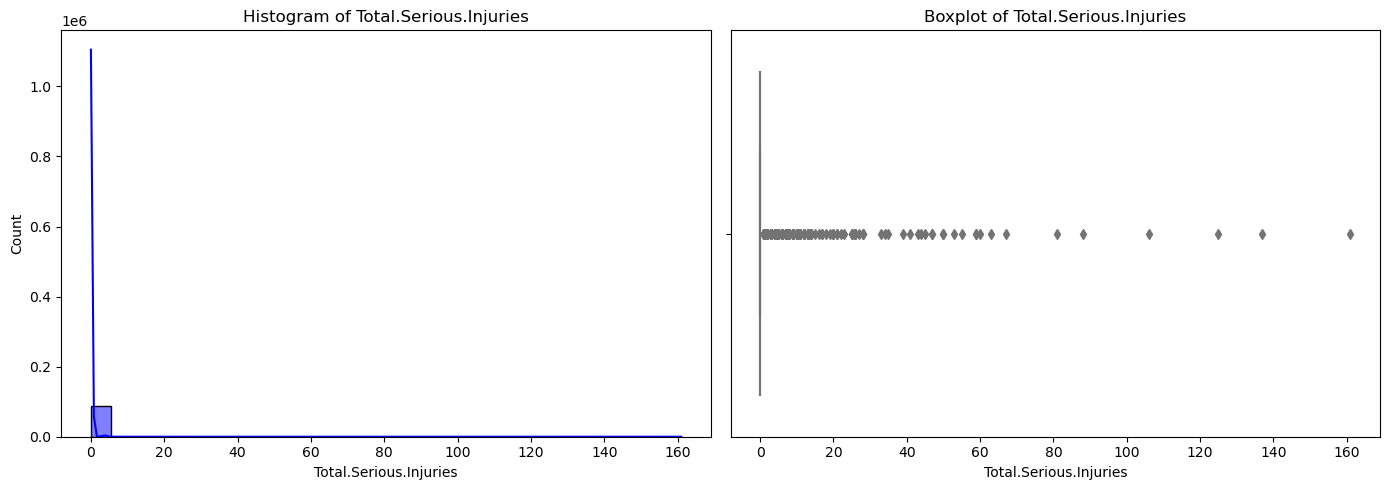

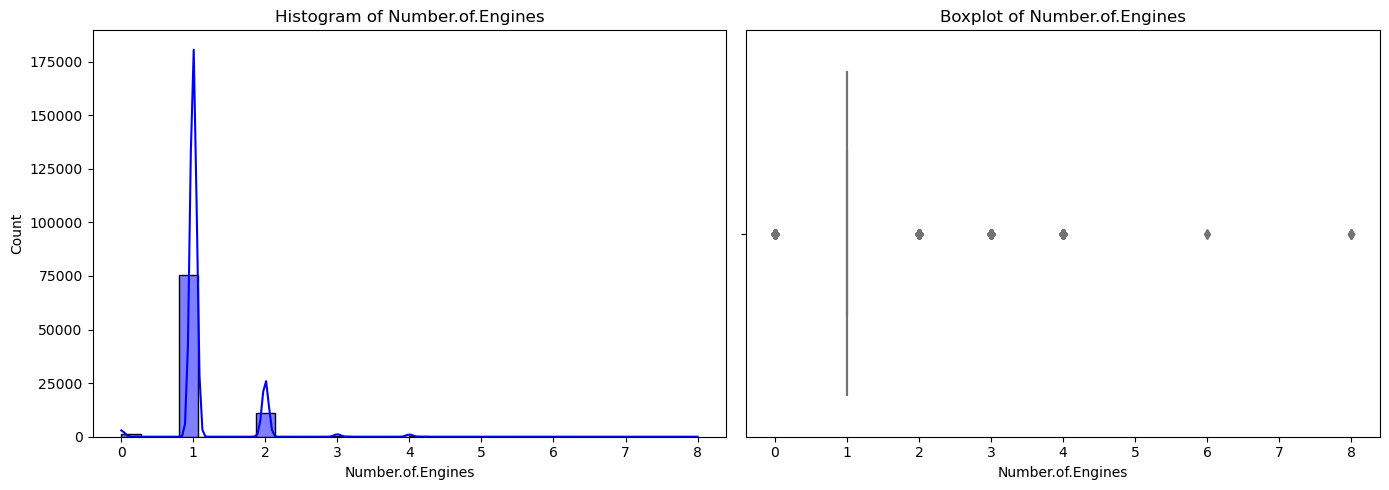

In [510]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_cols = [
    'Total.Uninjured',
    'Total.Fatal.Injuries',
    'Total.Minor.Injuries',
    'Total.Serious.Injuries',
    'Number.of.Engines'
]

for col in continuous_cols:
    plt.figure(figsize=(14,5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='Blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

#### 5.4  Basic Count of Injury Severity by Aircraft Category
It shows the volume of accidents

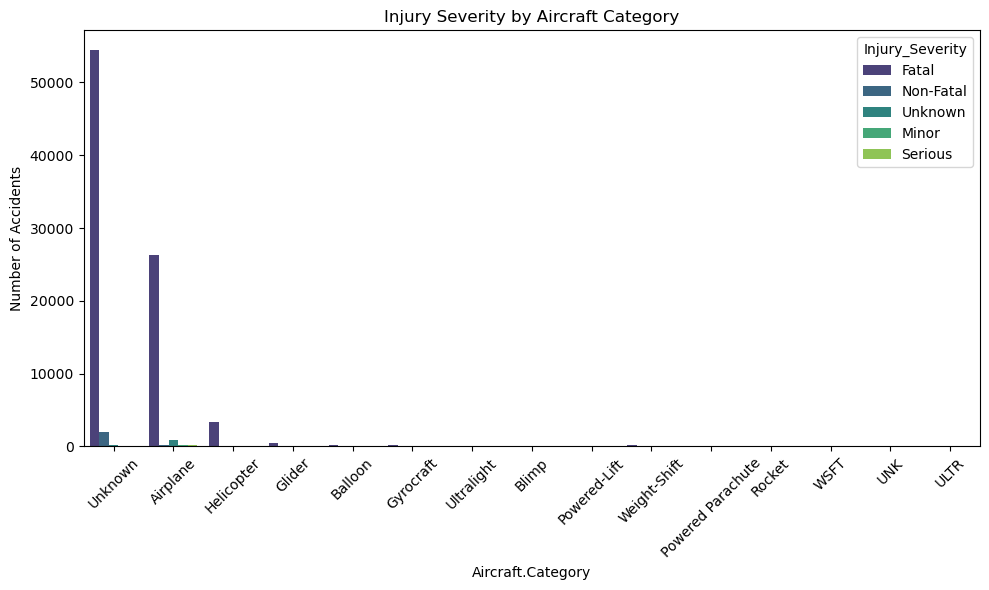

In [511]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Aircraft.Category', hue='Injury_Severity', palette='viridis')
plt.title('Injury Severity by Aircraft Category')
plt.xticks(rotation=45)
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

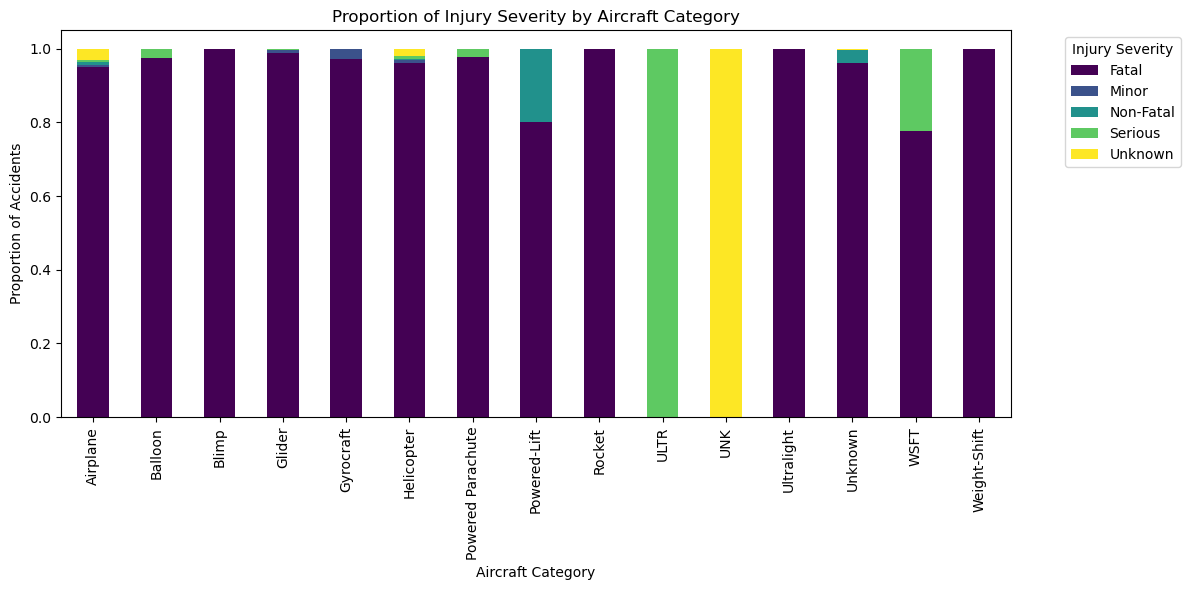

In [512]:
# Proportion plot (normalized)
cat_severity = pd.crosstab(df['Aircraft.Category'], df['Injury_Severity'], normalize='index')

cat_severity.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Proportion of Injury Severity by Aircraft Category")
plt.ylabel("Proportion of Accidents")
plt.xlabel("Aircraft Category")
plt.legend(title="Injury Severity", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

#### 5.5 Explore Most Common Aircraft Makes and do analysis for Injury Severity Distribution by Aircraft Make
   

In [513]:
# Get top 10 most frequent aircraft makes
top_makes = df['Make'].value_counts().head(10)

# Get the list of those top 10 makes
top_make_list = top_makes.index.tolist()

# Filter the original dataframe to only those top 10 makes
df_top_makes = df[df['Make'].isin(top_make_list)]
print(top_makes)

Make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: count, dtype: int64


##### 5.5.1 Data Standardization for the Make Column
**Note**: During analysis, I discovered that the same manufacturers (e.g., "Cessna", "Piper", "Boeing", "Mooney" and some others) were recorded under multiple labels due to inconsistent capitalization. To prevent fragmented insights and ensure correct accident severity comparisons, I standardized the names before proceeding with analysis.

Without standardization, these inconsistencies:
  - Skewed frequency counts, making some manufacturers appear less common than they actually are.
   - Fragmented severity analysis, meaning accident severities were split across multiple labels for the same company.

In [514]:
# Standardize all makes to UPPERCASE
df['Make'] = df['Make'].str.upper()

In [515]:
# First: make all lowercase for easier mapping
df['Make'] = df['Make'].str.lower()

# Manual mapping of known duplicates
make_mapping = {
    'cessna': 'Cessna',
    'boeing': 'Boeing',
    'piper': 'Piper',
    'beech': 'Beech',
    'mooney': 'Mooney',
    'bell': 'Bell',
    'grumman': 'Grumman',
    'ultramagic': 'Ultramagic',  
    # add more if you discover more duplicates
}

# Apply the mapping
df['Make'] = df['Make'].map(make_mapping).fillna(df['Make'].str.title())

In [516]:
# check remaining duplicates
df['Make'].value_counts().head(20)

Make
Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Mooney                1334
Robinson              1230
Grumman               1172
Bellanca              1045
Hughes                 932
Schweizer              773
Air Tractor            691
Aeronca                636
Mcdonnell Douglas      608
Maule                  589
Champion               519
Stinson                439
Aero Commander         429
De Havilland           422
Luscombe               414
Name: count, dtype: int64

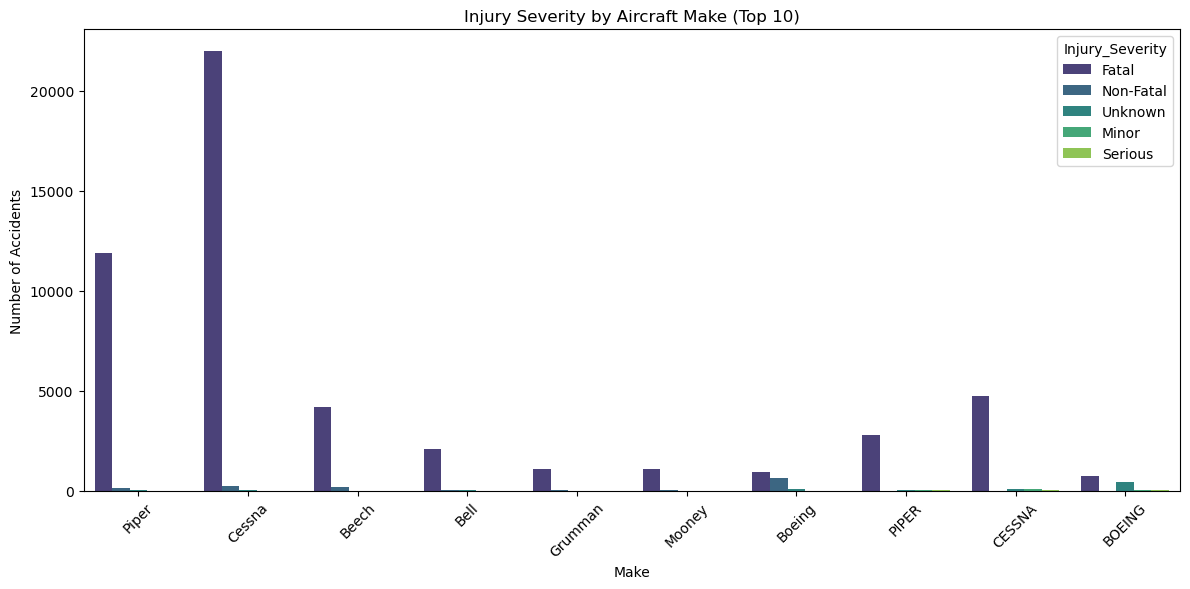

In [517]:
# sThis will show you which manufacturers have more severe accidents, or more non-injury ones.
plt.figure(figsize=(12,6))
sns.countplot(data=df_top_makes, x='Make', hue='Injury_Severity', palette='viridis')
plt.title('Injury Severity by Aircraft Make (Top 10)')
plt.xticks(rotation=45)
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

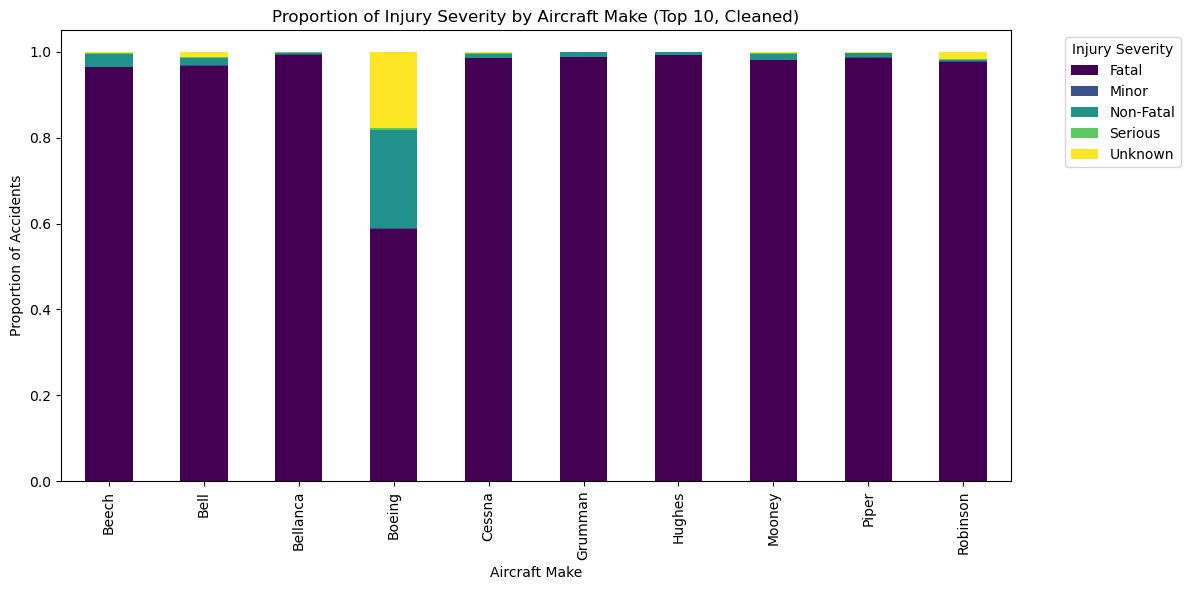

In [518]:
# Plot the proportions for Injury Severity by Aircraft Make(Top 10, Cleaned)
top_makes = df['Make'].value_counts().head(10)
top_make_list = top_makes.index.tolist()
df_top_makes = df[df['Make'].isin(top_make_list)]

make_severity = pd.crosstab(df_top_makes['Make'], df_top_makes['Injury_Severity'], normalize='index')

make_severity.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Proportion of Injury Severity by Aircraft Make (Top 10, Cleaned)")
plt.ylabel("Proportion of Accidents")
plt.xlabel("Aircraft Make")
plt.legend(title="Injury Severity", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

#### 5.6 Visualize Injury Severity by Contextual Factors

In [519]:
# Check for unique Values for the required columns in analysis
print(df['Weather.Condition'].value_counts())
print(df['Purpose.of.flight'].value_counts())


Weather.Condition
VMC    81795
IMC     5976
UNK      856
Unk      262
Name: count, dtype: int64
Purpose.of.flight
Personal                     49448
Unknown                      12994
Instructional                10601
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL       

In [520]:
print(df['Broad.phase.of.flight'].value_counts())
print(df['Injury_Severity'].value_counts())

Broad.phase.of.flight
Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: count, dtype: int64
Injury_Severity
Fatal        85183
Non-Fatal     2219
Unknown       1096
Minor          218
Serious        173
Name: count, dtype: int64


##### 5.6.1 Clean and Standardize the Categories

###### 5.6.1.1 **Weather.Condition**

In [521]:
# UNK and Unk in Weather.Condition both represent unknown values but with different cases.
# standardize by converting all to uppercase and grouping unknowns as one category.
df['Weather.Condition'] = df['Weather.Condition'].str.upper()
df['Weather.Condition'] = df['Weather.Condition'].replace({'UNK': 'UNKNOWN'})

###### 5.6.1.2 **Purpose of flight**

In [522]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.title().str.strip()
# Optionally group rare categories
rare_categories = df['Purpose.of.flight'].value_counts()[df['Purpose.of.flight'].value_counts() < 100].index
df['Purpose.of.flight'] = df['Purpose.of.flight'].replace(rare_categories, 'Other')

###### 5.6.1.3 **Broad.Phase.of.flight**

In [523]:
# Standardize case and strip whitespace
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].str.title().str.strip()

# Replace 'Unknown' with NaN (optional, if you want to treat unknown as missing)
import numpy as np
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].replace('Unknown', np.nan)

# Group smaller categories (less than 1000 occurrences) into 'Other'
counts = df['Broad.phase.of.flight'].value_counts()
small_categories = counts[counts < 1000].index
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].replace(small_categories, 'Other')

###### 5.6.1.4 **Injury_Severity**

In [524]:
df['Injury_Severity'] = df['Injury_Severity'].str.title().str.strip()

# Optionally group Minor and Serious under Non-Fatal:
df['Injury_Severity'] = df['Injury_Severity'].replace({'Minor': 'Non-Fatal', 'Serious': 'Non-Fatal'})

# exclude Unknown or treat as NaN:
df['Injury_Severity'] = df['Injury_Severity'].replace('Unknown', np.nan)

##### 5.6.2 Explore Injury Severity by each factor

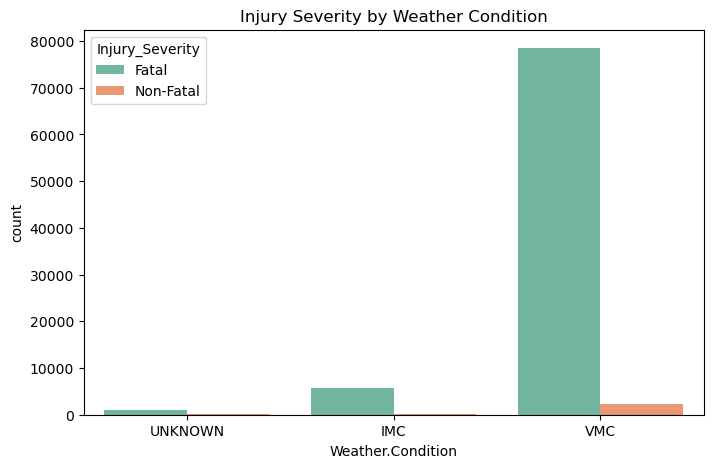

In [525]:
import seaborn as sns
import matplotlib.pyplot as plt
# For Weather.Condition
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Weather.Condition', hue='Injury_Severity', palette='Set2')
plt.title('Injury Severity by Weather Condition')
plt.show()

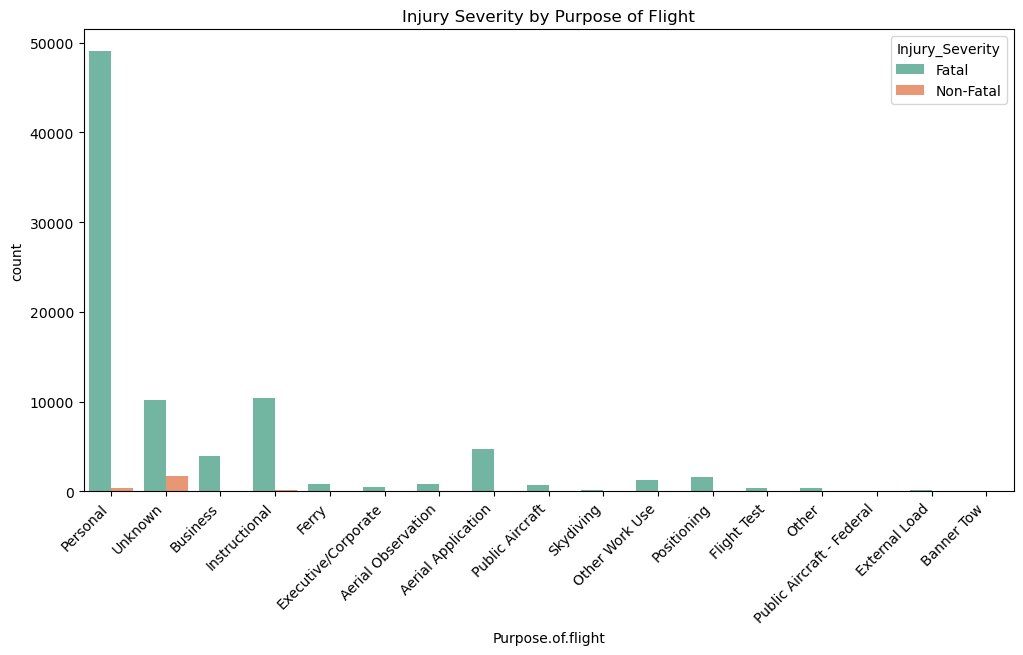

In [526]:
# for purpose.of.flight
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Purpose.of.flight', hue='Injury_Severity', palette='Set2')
plt.title('Injury Severity by Purpose of Flight')
plt.xticks(rotation=45, ha='right')
plt.show()

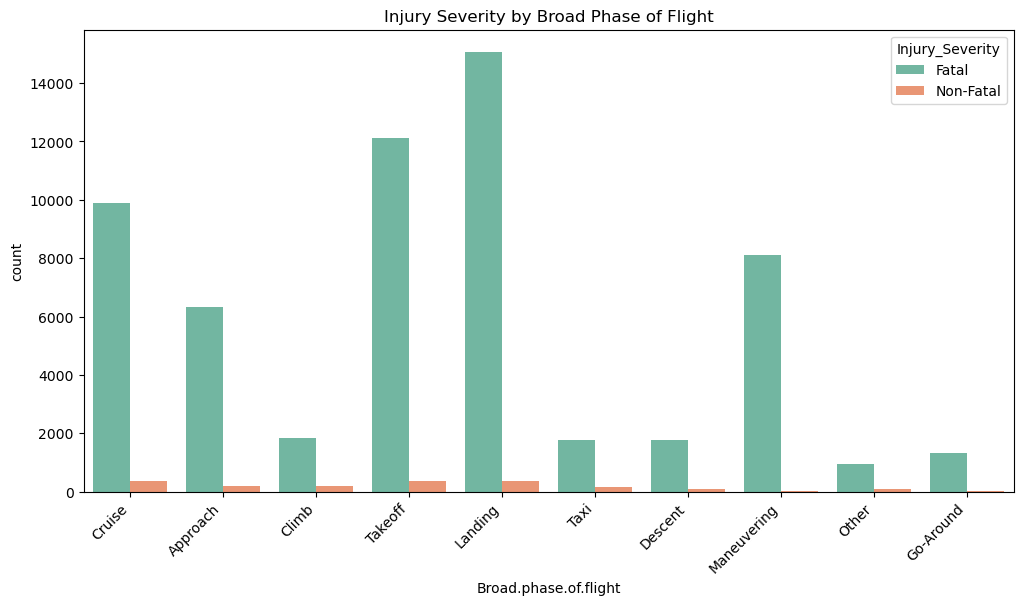

In [527]:
# For Broad.Phase.of.flight
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Broad.phase.of.flight', hue='Injury_Severity', palette='Set2')
plt.title('Injury Severity by Broad Phase of Flight')
plt.xticks(rotation=45, ha='right')
plt.show()

### 6. Findings / Insights(Interpret the results of EDA (patterns, trends, risk factors)).

   - Most aircraft categories show a high proportion of fatal injury severity in accidents. However, categories like Powered-Lift and some Ultralight aircraft have a more noticeable distribution of non-fatal and serious injuries, suggesting some variation in injury severity across categories.
   - Several categories (e.g., Rocket, UNK, ULTR) are dominated by unknown severity label  these are likely too unreliable for decision-making.
   - The Proportion for Injury Severity by Aircraft Make(Top 10) data reveals that Boeing aircraft have a noticeably higher proportion of non-fatal and unknown severity accidents compared to other manufacturers, which mostly show a higher proportion of fatal accidents.
   -  Landing and Takeoff phases have the highest accident severity.

   - Personal-use flights account for the majority of fatal accidents.

   - Most accidents occur in good weather (VMC), showing human/operational factors matter more than weather.

### 7. Recommendations
1. Prioritize safety interventions and accident prevention measures for aircraft categories with consistently high fatal injury proportions, such as Airplanes and Helicopters. For categories showing less severe injury distributions, investigate the factors contributing to better outcomes and explore how these can be adapted to other categories.

2. Focus safety improvement efforts on general aviation manufacturers like Cessna and Piper, where a larger proportion of accidents are fatal. Enhancing pilot training, maintenance standards, and safety protocols in these categories could significantly reduce accident severity.

3. Accidents are most severe during personal flights, especially in landing and takeoff phases. Weather is less of a driver than expected—most happen in clear conditions. For safer and lower-cost options, stakeholders should consider aircraft primarily operated in business or instructional contexts, where oversight and training reduce risks significantly
.


### 8. Conclusion

   - The predominance of fatal injuries across most aircraft categories highlights the overall high risk associated with aviation accidents. The variation in categories like Powered-Lift and Ultralight indicates that certain types of aircraft might experience less severe injuries, possibly due to their design, operational environments, or accident circumstances.
   - while Boeing aircraft are involved in accidents, the severity tends to be less fatal relative to other manufacturers in the dataset, possibly due to better safety features, operational contexts, or reporting standards.
   - Accident severity is driven mainly by personal-use flights during landing and takeoff, often in good weather, indicating human and operational factors are the key risks. Choosing aircraft for business or instructional use offers safer and more cost-effective operations.